# Практика. Обучение модели с помощью sklearn



```
# Выбран кодовый формат
```

## Цели задания

- Научиться строить модель линейной регрессии.
- Познакомиться с функционалом библиотеки Scikit-learn.

## Что нужно сделать

- Загрузить данные и ознакомиться с ними.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Получить качество модели с помощью MSE и MAE.
- Дополнить данные переменной.
- Реализовать построение новой модели с помощью  библиотеки Scikit-learn.
- Получить качество новой модели с помощью MSE и MAE.
- Сравнить полученные модели и сделать выводы.

Обратите внимание, что задание не нужно сдавать на проверку. 
После выполнения задания рекомендуем свериться с ответами, представленными ниже.

## Задача

Подключите библиотеки.

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Инициализируйте данные.

Пусть нам заданы 1000 точек — это матрица **X**, и есть целевая функция **Y**.

In [56]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 5 * x + 15 * x ** 5 + np.random.randn(1000, 1)

d = {'x': x.reshape(1,1000)[0], 'y': y.reshape(1,1000)[0]}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,4.389189
1,0.715189,7.401929
2,0.602763,7.056917
3,0.544883,4.230707
4,0.423655,2.823973


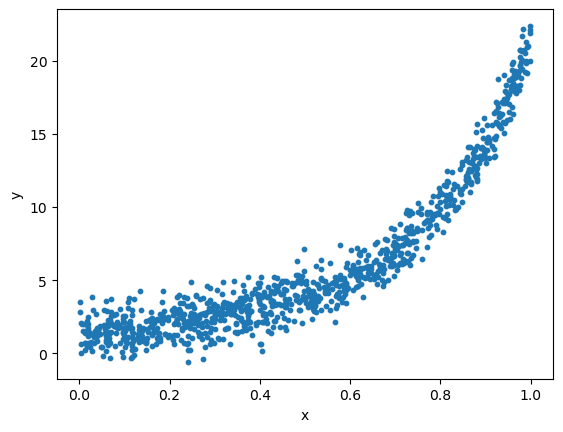

In [57]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 1. Найдите заданную зависимость с помощью линейной регресии



Разделите исходные данные на обучающую и тестовую выборки в соотношении 70% и 30%.

In [58]:
# подключить библиотеку для разделения на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split


In [59]:
# разделить исходные данные на обучающую и тестовую выборки

train, test = train_test_split(df, train_size = 0.7, random_state = 42)

Для построения самой модели подключите необходимый функционал из `sklearn`.

In [60]:
from sklearn.linear_model import LinearRegression

Создайте экземпляр класса `LinearRegression`, который будет содержать в себе модель регрессии.

In [69]:
model = LinearRegression()

Чтобы обучить модель, необходимо вызвать метод `.fit()` на объект `model`. В качестве аргументов здесь передаются матрица **X** и целевая функция **Y**. Обучать модель будем на обучающей выборке.

In [70]:
model.fit(train[['x']], train[['y']])

LinearRegression()

Поздравляем, модель готова!

Проанализируйте коэффициенты полученной модели.

In [72]:
coefficients = model.coef_
coefficients

array([[15.86533985]])

In [73]:
# коэффициенты модели
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: [-1.77415807]
w_1: [[15.86533985]]


Запишите полученное уравнение модели линейной регрессии.

Уравнение модели линейной регрессии будет иметь следующий вид:

`y = intercept + coef * x`

где:

`y` - предсказанное значение целевой переменной,

`intercept` - значение смещения (intercept),

`coef` - значение коэффициента (coefficient),

`x` - значение признака.

`y = -1.77415807 + 15.86533985 * x`

Посмотрите на графике, какую модель получили. Для этого создайте переменную `y_predict_train` и заполните её предсказанными значениями по обучающей выборке.

In [81]:
y_predict_train = model.predict(train[['x']])
y_predict_test = model.predict(test[['x']])

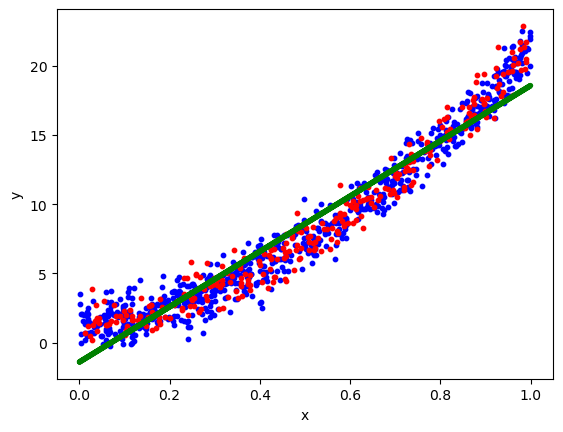

In [83]:
# расскомментируйте код перед запуском
# если меняли названия объектов, то здесь также нужно их заменить

plt.plot(train['x'], y_predict_train, linewidth=4, c='g')
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Получите результаты предсказания модели по тестовой выборке.

In [ ]:
y_predict_test = model.predict(test[['x']])

Оцените качество модели с помощью MSE.

In [86]:
from sklearn.metrics import mean_squared_error

# Вычисление MSE
mse_train = mean_squared_error(train['y'], y_predict_train)
mse_test = mean_squared_error(test['y'], y_predict_test)
print(f"mse_train: {mse_train}")
print(f"mse_test: {mse_test}")


mse_train: 2.4035940932759727
mse_test: 2.3078508257662658


Оцените также качество модели с помощью MAE.

In [87]:
from sklearn.metrics import mean_absolute_error

# Вычисление MAE
mae_train = mean_absolute_error(train['y'], y_predict_train)
mae_test = mean_absolute_error(test['y'], y_predict_test)
print(f"mae_train: {mae_train}")
print(f"mae_test: {mae_test}")

mae_train: 1.249117275460529
mae_test: 1.2250964333659067


### 2. Дополните данные переменной `x2 = x**2` и постройте модель с использованием двух переменных

In [101]:
df['x2'] = df['x'] ** 2
df

,x,y,x2,x3
0,0.548814,8.160314,0.301196,0.301196
1,0.715189,12.267664,0.511496,0.511496
2,0.602763,11.313263,0.363324,0.363324
3,0.544883,7.963715,0.296898,0.296898
4,0.423655,5.311508,0.179483,0.179483
...,...,...,...,...
995,0.097676,1.621835,0.009541,0.009541
996,0.514922,5.754620,0.265145,0.265145
997,0.938412,18.099064,0.880617,0.880617
998,0.228647,3.120635,0.052279,0.052279


In [100]:
df['x3'] = df['x'].apply(lambda x: x ** 2)

In [96]:
train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

In [97]:
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [103]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

Посмотрите на графике, какую модель мы получили.

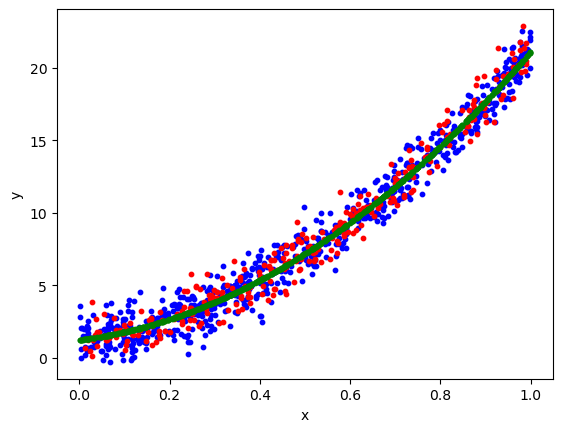

In [108]:
# расскомментируйте код перед запуском
# если меняли названия объектов, то здесь также нужно их заменить
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Оцените качество модели с помощью MSE.

In [109]:
# Вычисление MSE
mse_train = mean_squared_error(train['y'], y_predict_train)
mse_test = mean_squared_error(test['y'], y_predict_test)
print(f"mse_train: {mse_train}")
print(f"mse_test: {mse_test}")


mse_train: 0.9553345559754467
mse_test: 0.8643319642042341


Оцените также качество модели с помощью MAE.

In [110]:
# Вычисление MAE
mae_train = mean_absolute_error(train['y'], y_predict_train)
mae_test = mean_absolute_error(test['y'], y_predict_test)
print(f"mae_train: {mae_train}")
print(f"mae_test: {mae_test}")

mae_train: 0.7813137786760748
mae_test: 0.7273715175787046


### 3. Сделайте выводы по результатам построения моделей

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

## Ответы для самостоятельной проверки

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
np.random.seed(0) # для воспроизведения результатов
x = np.random.rand(1000, 1)
y = 1 + 5 * x + 15 * x ** 2 + np.random.randn(1000, 1)

d = {'x': x.reshape(1,1000)[0], 'y': y.reshape(1,1000)[0]}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.548814,8.160314
1,0.715189,12.267664
2,0.602763,11.313263
3,0.544883,7.963715
4,0.423655,5.311508


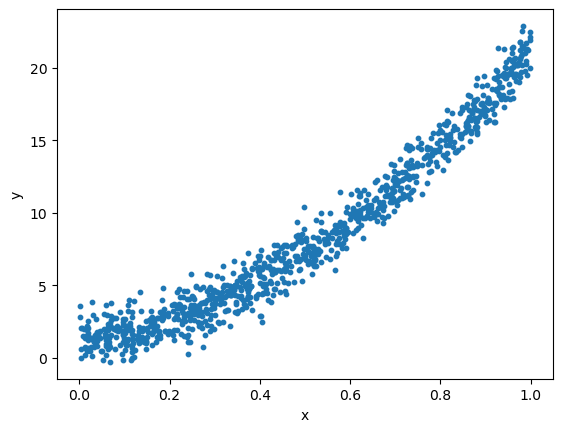

In [66]:
plt.scatter(df['x'], df['y'], s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Построим модель линейной регресии, предварительно разделив выборку на `train` и `test`.

In [76]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [79]:
# коэффициенты модели
print('w_0:', model.intercept_)
print('w_1:', model.coef_)

w_0: [-1.40630312]
w_1: [[19.9722818]]


Полученная модель имеет вид `y = -1.4 + 19.9 * x1`

Напомним, что исходная модель — `y = 1 + 5 * x + 15 * x ** 2`

In [ ]:
y_predict_train = model.predict(train[['x']])
y_predict_test = model.predict(test[['x']])

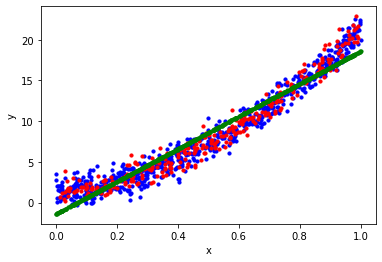

In [ ]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Посмотрим на качество модели.

In [ ]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 2.4035940932759727
Test MSE: 2.3078508257662658


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 1.249117275460529
Test MAE: 1.2250964333659067


Как вы уже знаете, задача машинного обучения — найти наиболее оптимальную модель. Попробуем улучшить нашу модель, добавив переменную квадрата переменной `x`.

In [95]:
df['x2'] = df['x'].apply(lambda x: x ** 2)

In [ ]:
train, test = train_test_split(df, train_size=0.7, random_state=123) # random_state нужен для воспроизводимости результата

Обратите внимание, что здесь и далее будем использовать уже две переменных: `x` и `x2`.

In [ ]:
model = LinearRegression()
model.fit(train[['x', 'x2']], train[['y']])

LinearRegression()

In [102]:
# коэффициенты модели
print('w_0:', model.intercept_)
print('w_1, w_2:', model.coef_)

w_0: [1.23205489]
w_1, w_2: [[ 3.93880839 15.90084072]]


Полученная модель имеет вид `y = 1.2 + 3.9 * x + 15.9 * x**2`

Напомним, что исходная модель — `y = 1 + 5 * x + 15 * x**2`

In [105]:
y_predict_train = model.predict(train[['x', 'x2']])
y_predict_test = model.predict(test[['x', 'x2']])

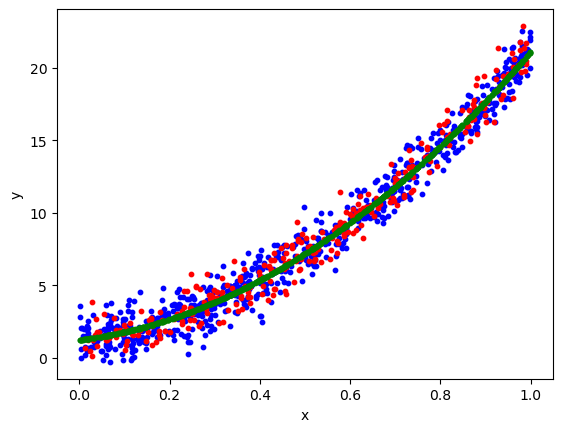

In [106]:
plt.scatter(train['x'], train['y'], s=10, c='b')
plt.scatter(test['x'], test['y'], s=10, c='r')
plt.scatter(train['x'], y_predict_train, s=10, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Видим, что график уже выглядит лучше. Оценим качество.

In [ ]:
train_mse = mean_squared_error(train[['y']], y_predict_train)
test_mse = mean_squared_error(test[['y']], y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.9553345559754468
Test MSE: 0.8643319642042345


In [ ]:
from sklearn.metrics import mean_absolute_error

train_mae = mean_absolute_error(train[['y']], y_predict_train)
test_mae = mean_absolute_error(test[['y']], y_predict_test)
print("Train MAE: {}".format(train_mae))
print("Test MAE: {}".format(test_mae))

Train MAE: 0.781313778676075
Test MAE: 0.7273715175787049


**Вывод:** в результате добавление переменной квадрата `x` позволило улучшить качество модели, то есть снизить ошибку.